<a href="https://colab.research.google.com/github/kikilohh/Rizki/blob/main/Citra%20Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Memuat dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Menampilkan informasi dataset
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

# Transformasi data (misalnya normalisasi)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Memuat dataset CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Menyiapkan DataLoader untuk batching
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Menampilkan jumlah data
print(f"Training samples: {len(trainset)}, Testing samples: {len(testset)}")

Files already downloaded and verified
Files already downloaded and verified
Training samples: 50000, Testing samples: 10000


In [3]:
from sklearn.datasets import load_iris
import numpy as np

# Muat dataset Iris
data = load_iris()
X = data.data  # Data fitur
y = data.target  # Label target

In [4]:
from tensorflow.keras.datasets import cifar10

# Muat dataset CIFAR-10
(X, y), (_, _) = cifar10.load_data()
X = X.reshape(X.shape[0], -1)  # Ubah dimensi jika diperlukan (contoh untuk model non-CNN)
y = y.flatten()  # Ubah menjadi array 1D untuk kompatibilitas

In [5]:
print("Dimensi X:", X.shape)
print("Dimensi y:", y.shape)

Dimensi X: (50000, 3072)
Dimensi y: (50000,)


In [6]:
from sklearn.model_selection import train_test_split

# Langkah 1: Bagi dataset menjadi train + validation dan test (80% train + validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Langkah 2: Bagi train + validation menjadi train dan validation (80% dari 80% menjadi train, 20% dari 80% menjadi validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)
# 0.125 = 10% / 80%

# Verifikasi ukuran dataset
print(f"Ukuran dataset Train: {len(X_train)}")
print(f"Ukuran dataset Validation: {len(X_val)}")
print(f"Ukuran dataset Test: {len(X_test)}")

Ukuran dataset Train: 35000
Ukuran dataset Validation: 5000
Ukuran dataset Test: 10000


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Membuat model CNN
model = Sequential()

# Lapisan konvolusi pertama
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Masukan: 32x32 RGB
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Lapisan konvolusi kedua
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Lapisan konvolusi ketiga
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [16]:
# Lapisan konvolusi keempat
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Lapisan Flatten untuk mengubah tensor menjadi vektor
model.add(Flatten())

# Lapisan Dense (Fully Connected Layer)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout tambahan untuk mencegah overfitting

# Lapisan output dengan 10 kelas
model.add(Dense(10, activation='softmax'))

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Menampilkan arsitektur model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 0, 0, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 0, 0, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 0, 0, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,058 (1.50 MB)

 Trainable params: 394,058 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Membuat model CNN
model = Sequential([
    # Lapisan konvolusi pertama
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Lapisan konvolusi kedua
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Lapisan konvolusi ketiga
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Lapisan konvolusi keempat
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Lapisan Flatten untuk mengubah tensor menjadi vektor
    Flatten(),

    # Lapisan Dense (Fully Connected Layer)
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout tambahan

    # Lapisan output dengan 10 kelas
    Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Menampilkan arsitektur model
model.summary()

SyntaxError: incomplete input (<ipython-input-18-69bb2bd5fa82>, line 25)

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Definisi Model CNN
class CNN(nn.Module):
    def __init__(self): # Changed _init_ to __init__
        super(CNN, self).__init__()
        # Lapisan konvolusi pertama
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Tambah padding
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)

        # Lapisan konvolusi kedua
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Tambah padding
        self.dropout2 = nn.Dropout(0.25)

        # Lapisan konvolusi ketiga
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Tambah padding
        self.dropout3 = nn.Dropout(0.25)

        # Lapisan konvolusi keempat
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)  # Tambah padding
        self.dropout4 = nn.Dropout(0.25)

        # Fully Connected Layers
        self.fc1 = nn.Linear(256 * 2 * 2, 512)  # Sesuaikan dimensi input
        self.fc2 = nn.Linear(512, 10)
        self.dropout_fc = nn.Dropout(0.5)



In [14]:
   def forward(self, x):
        # Forward pass
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = self.dropout1(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout2(x)

        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = self.dropout3(x)

        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = self.dropout4(x)

        x = x.view(-1, 256 * 2 * 2)  # Flatten layer
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)

        x = self.fc2(x)  # Output layer
        return x

# Inisialisasi model
model = CNN()

# Optimizer dan Loss Function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Menampilkan struktur model
print(model)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout2): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout3): Dropout(p=0.25, inplace=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout4): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout_fc): Dropout(p=0.5, inplace=False)
)


In [10]:
import torch
from torchvision import datasets, transforms

# Transformasi Data (Normalisasi dengan mean dan std)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Tambahkan std
])

# Dataset CIFAR-10 (contoh dataset)
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/70
Train Loss: 1.6538, Train Accuracy: 38.14%
Val Loss: 1.2899, Val Accuracy: 52.96%
--------------------------------------------------
Epoch 2/70
Train Loss: 1.2945, Train Accuracy: 52.88%
Val Loss: 1.0674, Val Accuracy: 61.58%
--------------------------------------------------
Epoch 3/70
Train Loss: 1.1151, Train Accuracy: 60.11%
Val Loss: 0.9616, Val Accuracy: 65.81%
--------------------------------------------------
Epoch 4/70
Train Loss: 1.0084, Train Accuracy: 64.24%
Val Loss: 0.8303, Val Accuracy: 70.12%
--------------------------------------------------
Epoch 5/70
Train Loss: 0.9280, Train Accuracy: 67.38%
Val Loss: 0.8137, Val Accuracy: 71.13%
--------------------------------------------------
Epoch 6/70
Train Loss: 0.8722, Train Accuracy: 69.09%
Val Loss: 0.7733, Val Accuracy: 72.53%
--------------------------------------------------
Epoch 7/70
Train Loss: 0.8323, Train Accuracy: 70.56%
Val Lo

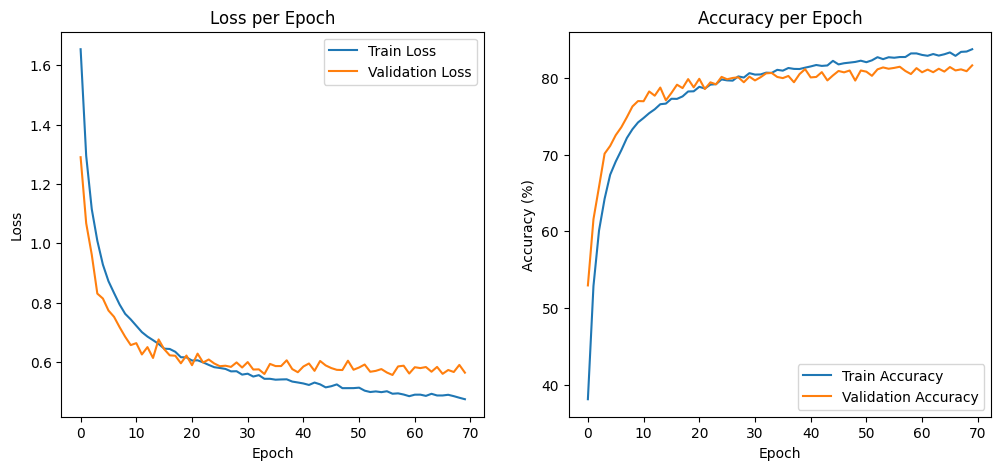

In [11]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim

# Transformasi Data (Normalisasi)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalisasi data
])

# Dataset CIFAR-10 (contoh dataset)
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Membagi dataset menjadi training dan validation (80:20)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# DataLoader
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definisi Model (gunakan model CNN yang telah dibuat)
model = CNN()

# Optimizer dan Loss Function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimasi Adam
criterion = nn.CrossEntropyLoss()  # Fungsi loss

# Training Loop
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=15):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Menyimpan data untuk grafik
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        # Training Mode
        model.train()
        train_loss, train_correct = 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Statistik
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == labels).sum().item()

        # Validation Mode
        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()

        # Statistik Epoch
        train_loss /= len(train_loader)
        train_accuracy = 100 * train_correct / len(train_loader.dataset)
        val_loss /= len(val_loader)
        val_accuracy = 100 * val_correct / len(val_loader.dataset)

        # Menyimpan data untuk grafik
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")
        print('-' * 50)

    # Menampilkan grafik
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), train_losses, label="Train Loss")
    plt.plot(range(epochs), val_losses, label="Validation Loss")
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), train_accuracies, label="Train Accuracy")
    plt.plot(range(epochs), val_accuracies, label="Validation Accuracy")
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()

# Melatih Model
epochs = 70
train_model(model, train_loader, val_loader, criterion, optimizer, epochs)

In [12]:
# Fungsi untuk evaluasi pada dataset test
def evaluate_model(model, test_loader, criterion):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()  # Set model ke evaluasi mode

    test_loss, correct_predictions = 0, 0
    total = 0

    with torch.no_grad():  # Tidak perlu menghitung gradien saat evaluasi
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Hitung loss dan akurasi
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total += labels.size(0)

    # Rata-rata loss
    test_loss /= len(test_loader)
    # Akurasi
    accuracy = 100 * correct_predictions / total

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

# Mengevaluasi model pada dataset test
evaluate_model(model, test_loader, criterion)

Test Loss: 0.6029, Test Accuracy: 80.72%
